## Map of forcing regime

This notebook plots the maps of surface forcing regimes for each month estimated from the JRA55-do forced GOTM5 simulations.
Seven forcing regimes, shear turbulence (S), Langmuir turbulence (L), convective turbulence (C), combined shear and Langmuir turbulence (SL), combined shear and convective turbulence (SC), combined Langmuir and convective turbulence (LC), and a combination of all (SLC), are color coded according to the color bar.
Locations without enough data for the categorization are shown in gray (NA).

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.environ['GOTMWORK_ROOT']+'/tools', )
from gotmanalysis import GOTMMap, plot_forcing_regime_map
np.seterr(all='raise')
%matplotlib inline

In [2]:
casename = 'JRA55-do_Global_dampV5d_3h_r4'
forcing_reg_type = 'BG12'
turbmethod = 'KPP-CVMix'
fig_root = os.environ['GOTMFIG_ROOT']+'/'+casename
figformat = 'pdf'

In [3]:
# check time tag
month_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',\
                'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
timetag_list = ['20090101-20090131',
                '20090201-20090228',
                '20090301-20090331',
                '20090401-20090430',
                '20090501-20090531',
                '20080601-20080630',
                '20080701-20080731',
                '20080801-20080831',
                '20080901-20080930',
                '20081001-20081031',
                '20081101-20081130',
                '20081201-20081231']

### Read data

In [4]:
# read data
mon_gmobj = []
for j in np.arange(12):
    timetag = timetag_list[j]
    s1data_root = os.environ['GOTMRUN_ROOT']+'/'+casename+'/VR1m_DT600s_'+timetag
    s2data_root = os.environ['GOTMFIG_ROOT']+'/data/'+casename+'/VR1m_DT600s_'+timetag
    os.makedirs(s2data_root, exist_ok=True)
    os.makedirs(fig_root, exist_ok=True)
    # get forcing regime
    basepath = s1data_root+'/'+turbmethod
    s2data_name = s2data_root+'/data_map_forcing_regime_'+forcing_reg_type+ \
                  '_'+turbmethod+'.npz'
    # read data
    gmobj = GOTMMap().load(s2data_name)
    # append to list
    mon_gmobj.append(gmobj)

### Figure

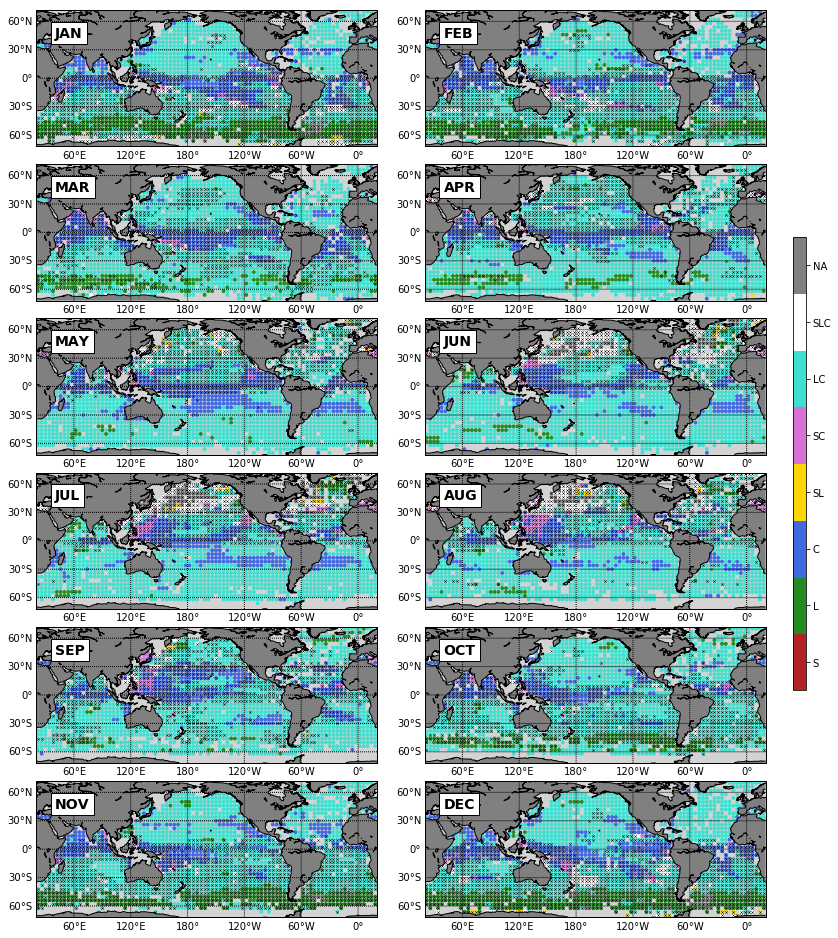

In [5]:
# plot figure
nrow = 6
fig_width = 12
fig_height = 13

# plot figure
height_ratios = [1]*nrow
height_ratios.append(0.15)
width_ratios = [1, 1, 0.05]
f, axarr = plt.subplots(nrow, 2, sharex='col')
f.set_size_inches(fig_width, fig_height)

# plot
for j in np.arange(12):
    m = j//2
    n = j%2
    mlabel = month_labels[j]
    im0 = plot_forcing_regime_map(mon_gmobj[j], axis=axarr[m,n], add_colorbar=False)
    # label
    axarr[m,n].text(40, 55, mlabel, fontsize=14, color='k', fontweight='bold', va='top',
                    bbox=dict(boxstyle="square",ec='k',fc='w'))

# reduce margin
plt.tight_layout()

# colorbar
cb_ticks = [1, 2, 3, 4, 5, 6, 7, 8]
cb_ticks_labels = ['S', 'L', 'C', 'SL', 'SC', 'LC', 'SLC', 'NA']
plt.subplots_adjust(right=0.95)
cax0 = plt.axes([0.85, 0.15, 0.1, 0.7])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0, ticks=cb_ticks, aspect=35)
cb0.ax.set_yticklabels(cb_ticks_labels)

# save figure
figname = fig_root+'/map_forcing_regime_all_'+forcing_reg_type+'.'+figformat
plt.savefig(figname, dpi = 300)